In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
training_points = [
    [158,58],[158,59],[158,63],[160,59],[160,60],[163,60],[163,61],[160,64],[163,64],[165,61],[165,62],[165,65],[168,62],[168,63],[168,66],[170,63],[170,64],[170,68]
]

training_labels=[0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(training_points, training_labels, test_size=0.2, random_state=4)
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(X_train, y_train)

guesses = classifier.predict(X_test)
print(guesses)

[0 0 1 1]


In [7]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, guesses))

[[2 0]
 [0 2]]


In [10]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

training_points = cancer.data
training_labels = cancer.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(training_points, training_labels, test_size = 0.2, random_state =4)

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train,y_train)

guesses = classifier.predict(X_test)

In [11]:
print(confusion_matrix(y_test, guesses))

[[29  5]
 [ 9 71]]


In [13]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,guesses))

0.8771929824561403


In [14]:
print(metrics.precision_score(y_test,guesses,average='binary'))

0.9342105263157895


In [15]:
print(metrics.recall_score(y_test,guesses,average='binary'))

0.8875


In [16]:
print(metrics.f1_score(y_test,guesses,average='binary'))

0.9102564102564101


In [17]:
import pandas as pd

In [18]:
df = pd.read_csv('heart.csv')

In [19]:
print(df.head())
print(df.shape)
print(df.info())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

   ca        thal  target  
0   0       fixed       0  
1   3      normal       1  
2   2  reversible       0  
3   0      normal       0  
4   0      normal       0  
(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int6

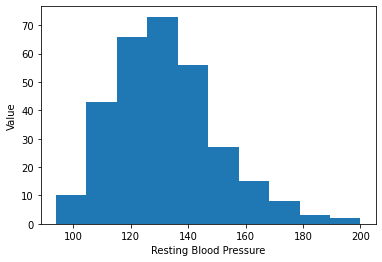

In [20]:
plt.hist(df['trestbps'])
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Value')
plt.show()

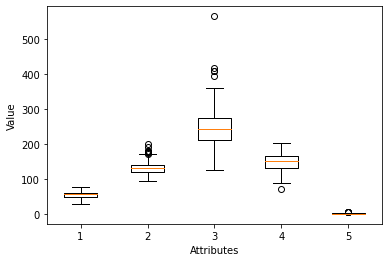

In [21]:
data_to_boxplot=[df['age'],df['trestbps'],df['chol'],df['thalach'],df['oldpeak']]
plt.boxplot(data_to_boxplot)
plt.xlabel('Attributes')
plt.ylabel('Value')
plt.show()

In [23]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [24]:
print(metrics.accuracy_score(y_test,guesses))

0.8771929824561403


In [25]:
classifier = KNeighborsClassifier(n_neighbors =5)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)
print(confusion_matrix(y_test,guesses))
print(metrics.accuracy_score(y_test, guesses))

[[29  5]
 [ 9 71]]
0.8771929824561403


In [27]:
training_points = df.drop(columns=['target', 'thal'])
training_labels = df['target']

X_train, X_test, y_train, y_test = train_test_split(
training_points, training_labels, test_size=0.3, random_state=4)

In [28]:
classifier = KNeighborsClassifier(n_neighbors =5)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)
print(confusion_matrix(y_test,guesses))
print(metrics.accuracy_score(y_test, guesses))

[[54  3]
 [26  8]]
0.6813186813186813


In [29]:
k_range = range(1,50)
accuracy_scores = []
for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
    
print(accuracy_scores)

[0.6923076923076923, 0.6593406593406593, 0.6923076923076923, 0.6593406593406593, 0.6813186813186813, 0.6593406593406593, 0.6813186813186813, 0.6593406593406593, 0.6593406593406593, 0.6593406593406593, 0.6703296703296703, 0.6593406593406593, 0.6483516483516484, 0.6483516483516484, 0.6703296703296703, 0.6593406593406593, 0.6593406593406593, 0.6373626373626373, 0.6373626373626373, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6373626373626373, 0.6373626373626373, 0.6373626373626373, 0.6263736263736264, 0.6263736263736264, 0.6373626373626373, 0.6373626373626373, 0.6373626373626373, 0.6373626373626373, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264]


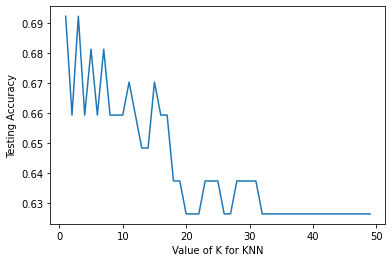

In [30]:
plt.plot(k_range,accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [38]:
from sklearn.preprocessing import StandardScaler

df_model = df.copy()
scaler = StandardScaler()
features = [['age','trestbps','chol','thalach','oldpeak']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])
    
training_points = df_model.drop(columns =['target','thal'])
training_labels = df_model['target']

X_train, X_test, y_train, y_test = train_test_split(
training_points, training_labels, test_size=0.1, random_state=4)

k_range = range(1,50)
accuracy_scores = []
for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
    
print(accuracy_scores)

[0.8064516129032258, 0.7419354838709677, 0.8387096774193549, 0.7741935483870968, 0.8064516129032258, 0.8709677419354839, 0.8709677419354839, 0.8387096774193549, 0.9032258064516129, 0.8387096774193549, 0.8709677419354839, 0.8387096774193549, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8387096774193549, 0.8709677419354839, 0.8387096774193549, 0.8709677419354839, 0.8387096774193549, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8387096774193549, 0.8064516129032258, 0.8064516129032258, 0.8387096774193549, 0.8387096774193549, 0.8709677419354839, 0.8387096774193549, 0.8709677419354839]


In [32]:
df_model

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.933840,1,1,0.745781,-0.260087,1,2,0.034808,0,1.068045,3,0,fixed,0
1,1.378211,1,4,1.592329,0.757388,0,2,-1.780616,1,0.380229,2,3,normal,1
2,1.378211,1,4,-0.665131,-0.336877,0,2,-0.872904,1,1.325977,2,2,reversible,0
3,-1.954574,1,3,-0.100766,0.066273,0,0,1.634109,0,2.099771,3,0,normal,0
4,-1.510203,0,2,-0.100766,-0.816818,0,2,0.985744,0,0.294252,1,0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-0.288181,1,1,-0.778004,-1.162375,0,2,1.763783,0,-0.909428,2,0,fixed,0
299,-1.288017,0,4,0.012107,1.813257,1,2,-0.570333,1,1.669885,2,0,reversible,1
300,1.156026,1,4,0.181416,0.143064,0,2,-0.959353,0,1.497931,2,1,reversible,1
301,-0.732553,1,4,-0.100766,0.181459,1,2,0.034808,1,-0.909428,1,2,reversible,1


In [34]:
k_range = range(1,50)
accuracy_scores = []
for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
    
print(accuracy_scores)

[0.6923076923076923, 0.6593406593406593, 0.6923076923076923, 0.6593406593406593, 0.6813186813186813, 0.6593406593406593, 0.6813186813186813, 0.6593406593406593, 0.6593406593406593, 0.6593406593406593, 0.6703296703296703, 0.6593406593406593, 0.6483516483516484, 0.6483516483516484, 0.6703296703296703, 0.6593406593406593, 0.6593406593406593, 0.6373626373626373, 0.6373626373626373, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6373626373626373, 0.6373626373626373, 0.6373626373626373, 0.6263736263736264, 0.6263736263736264, 0.6373626373626373, 0.6373626373626373, 0.6373626373626373, 0.6373626373626373, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264]


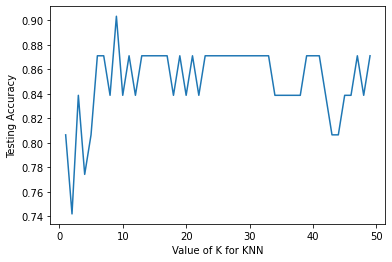

In [39]:
plt.plot(k_range,accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [51]:
from sklearn.preprocessing import MinMaxScaler

df_model = df.copy()
scaler = MinMaxScaler()
features = [['age','trestbps','chol','thalach','oldpeak']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])

training_points = df_model.drop(columns =['target','thal'])
training_labels = df_model['target']

X_train, X_test, y_train, y_test = train_test_split(
training_points, training_labels, test_size=0.1, random_state=4)


In [52]:
k_range = range(1,50)
accuracy_scores = []
for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
    
print(accuracy_scores)

[0.8064516129032258, 0.8064516129032258, 0.9032258064516129, 0.8709677419354839, 0.9032258064516129, 0.8709677419354839, 0.9032258064516129, 0.8709677419354839, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.8064516129032258, 0.8387096774193549, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549]


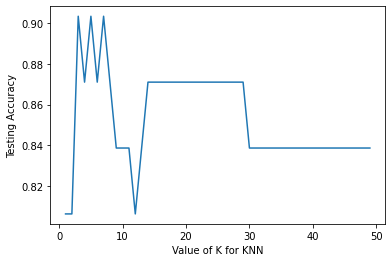

In [53]:
plt.plot(k_range,accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()